In [33]:
# -*- coding: utf-8 -*-
#
# Perceptronによる二項分類
#
# 2015/04/24 ver1.0
# 2019/09/03 ver1.1 Python2 -> Python3 図の大きさ余白を調節
#
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame
from numpy.random import multivariate_normal
# jupyter notebookで図を表示したいので
%matplotlib inline 

In [34]:
#------------#
# Parameters #
#------------#
N1 = 20         # クラス t=+1 のデータ数
Mu1 = [15,10]   # クラス t=+1 の中心座標

N2 = 30         # クラス t=-1 のデータ数
Mu2 = [0,0]     # クラス t=-1 の中心座標

Variances = [15,30] # 両クラス共通の分散（2種類の分散で計算を実施）

In [35]:
# データセット {x_n,y_n,type_n} を用意
def prepare_dataset(variance):
    cov1 = np.array([[variance,0],[0,variance]])
    cov2 = np.array([[variance,0],[0,variance]])

    df1 = DataFrame(multivariate_normal(Mu1,cov1,N1),columns=['x','y'])
    df1['type'] = 1
    df2 = DataFrame(multivariate_normal(Mu2,cov2,N2),columns=['x','y'])
    df2['type'] = -1 
    df = pd.concat([df1,df2],ignore_index=True)
    df = df.reindex(np.random.permutation(df.index)).reset_index(drop=True)
    return df

In [36]:
# Perceptronのアルゴリズム（確率的勾配降下法）を実行
def run_simulation(variance, data_graph, param_graph):
    train_set = prepare_dataset(variance)
    train_set1 = train_set[train_set['type']==1]
    train_set2 = train_set[train_set['type']==-1]
    ymin, ymax = train_set.y.min()-5, train_set.y.max()+10
    xmin, xmax = train_set.x.min()-5, train_set.x.max()+10
    data_graph.set_ylim([ymin-1, ymax+1])
    data_graph.set_xlim([xmin-1, xmax+1])
    data_graph.scatter(train_set1.x, train_set1.y, marker='o', label=None)
    data_graph.scatter(train_set2.x, train_set2.y, marker='x', label=None)

    # パラメータの初期値とbias項の設定
    w0 = w1 = w2 = 0.0
#    bias = 0.5 * (train_set.x.abs().mean() + train_set.y.abs().mean())
    bias = 1
    # Iterationを30回実施
    paramhist = DataFrame([[w0,w1,w2]], columns=['w0','w1','w2'])
    for i in range(30):
        for index, point in train_set.iterrows():
            x, y, type = point.x, point.y, point.type
            if type * (w0*bias + w1*x + w2*y) <= 0:
                w0 += type * bias
                w1 += type * x
                w2 += type * y
        paramhist = paramhist.append(
                        Series([w0,w1,w2], ['w0','w1','w2']),
                        ignore_index=True)
    # 判定誤差の計算
    err = 0.0
    for index, point in train_set.iterrows():
        x, y, type = point.x, point.y, point.type
        if type * (w0*bias + w1*x + w2*y) <= 0:
            err += 1
    err_rate = err * 100 / len(train_set)

    # 結果の表示
    linex = np.arange(xmin-5, xmax+5)
    liney = - linex * w1 / w2 - bias * w0 / w2
    label = "ERR %.2f%%" % err_rate
    data_graph.plot(linex, liney, label=label, color='red')
    data_graph.legend(loc=1)
    paramhist.plot(ax=param_graph)
    param_graph.legend(loc=1)

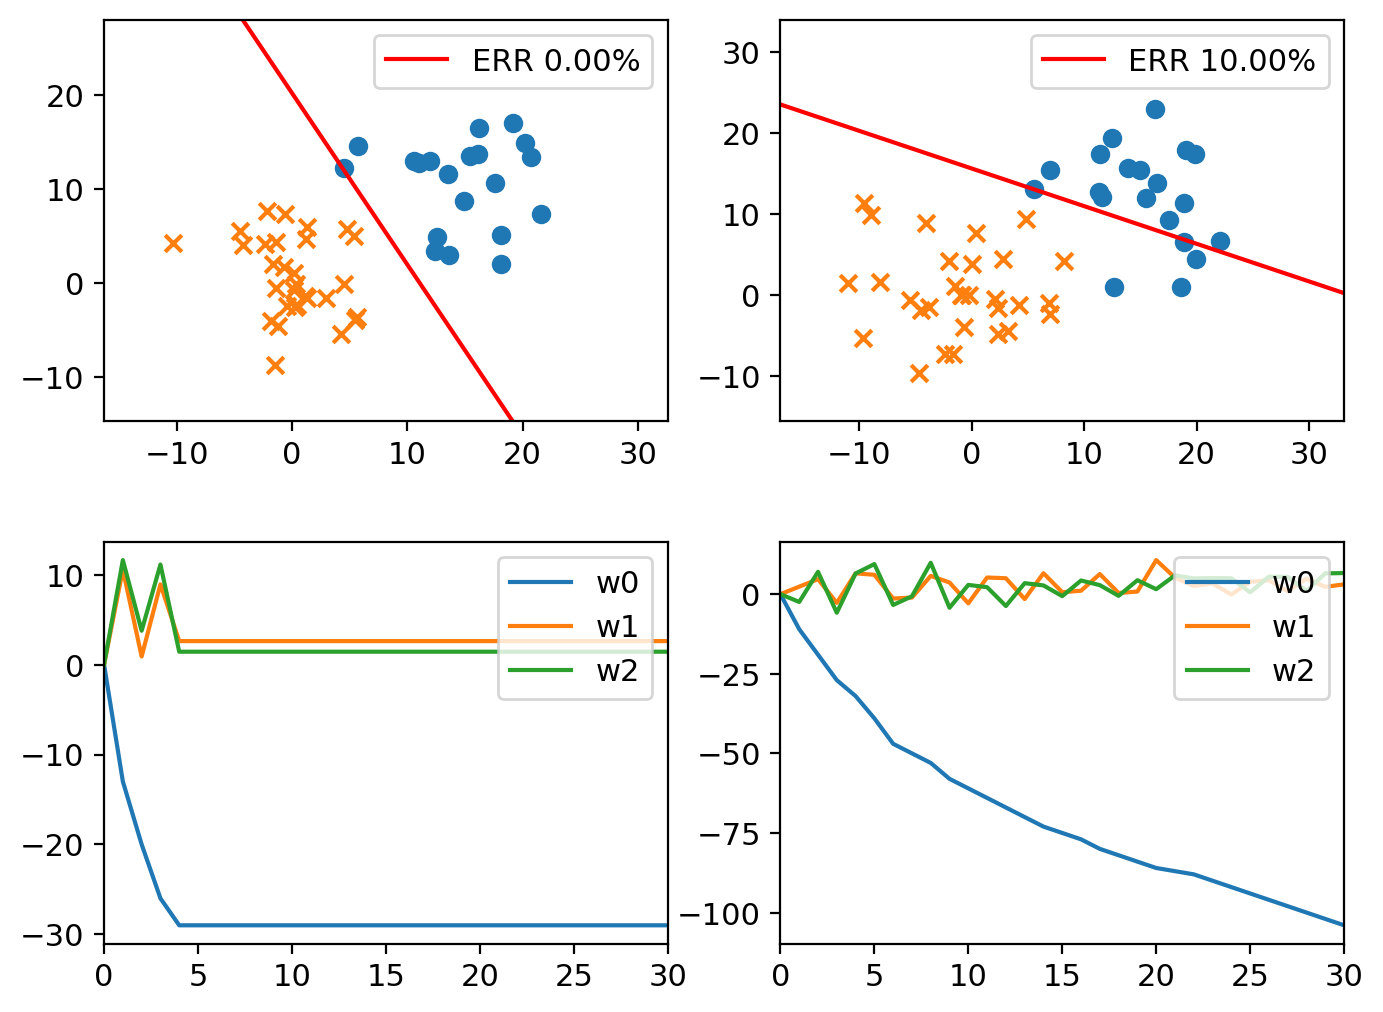

In [37]:
# Main
if __name__ == '__main__':
    
    fig = plt.figure(figsize=(8, 6))
    # 余白を設定
    plt.subplots_adjust(wspace=0.2, hspace=0.3)
    plt.rcParams['font.family'] = 'DejaVu Sans'    # 2種類の分散で実行
    for c, variance in enumerate(Variances):
        subplots1 = fig.add_subplot(2,2,c+1)
        subplots2 = fig.add_subplot(2,2,c+2+1)
        run_simulation(variance, subplots1, subplots2)
#     fig.show() #jupyter notebookでは必要ない